In [1]:
import pandas as pd
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
import squidpy as sq
import scanpy as sc
from anndata import AnnData
from issutils import create_adata

## Load data and display table

In [3]:
data = pd.read_csv('example_data.csv')
data

,x,y,name,rounds,channels
0,333,157,Reln,0;1;2;3;4,0;1;2;1;2
1,334,169,Htr3a,0;1;2;3;4,1;0;2;1;3
2,457,14,Cnr1,0;1;2;3;4,0;2;1;2;3
3,453,55,Slc6a1,0;1;2;3;4,2;0;2;0;3
4,378,71,Slc6a1,0;1;2;3;4,2;0;2;0;3
...,...,...,...,...,...
317627,9055,4891,Pde1a,0;1;2;3;4,1;0;3;2;2
317628,9141,5075,Pde1a,0;1;2;3;4,1;0;3;2;2
317629,9060,5084,Pde1a,0;1;2;3;4,1;0;3;2;2
317630,8745,5093,Pde1a,0;1;2;3;4,1;0;3;2;2


## Create AnnData

```
    - Gene neighbourhood vectors are created by counting genes in small neighbourhoods.
    - Genes close to the center of each neighbourhood gets a high weight.
    - Genes far away from the center of the neighbourhood gets a low weight.
    - The weights are computed using a Gaussian kernel with standard-deviation
      defined by the parameter 'spatial_scale'. 
    - The radius of a neighbourhood is 3*spatial_scale.
    - If bin_type = 'Gaussian_per_poin' we place one neighbourhood centered around each gene markers.
    - If bin_type =  'Gaussian_grid' we place neighbourhood on a structured grid. Stride is then spatial_scale.
```

In [4]:
spatial_scale = 5.0
bin_type = 'gaussian_grid'

adata = create_adata(data, 
    spatial_scale=spatial_scale, 
    spatial_columns=['x','y'], 
    gene_type_column='name', 
    bin_type=bin_type)

c:\Users\chrav452\Documents\GitHub\Courses\ISS_Pipeline\5_Analysis_tools\issutils.py:144: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(gene_vectors, obsm={"spatial": bin_coords}, var=var)
C:\Users\chrav452\Anaconda3\envs\ISS_Pipeline\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Save the adata to file (for future loading)

In [5]:
adata.write_h5ad('myadata.h5ad')

Do some squidpy/scanpy hocus pocus

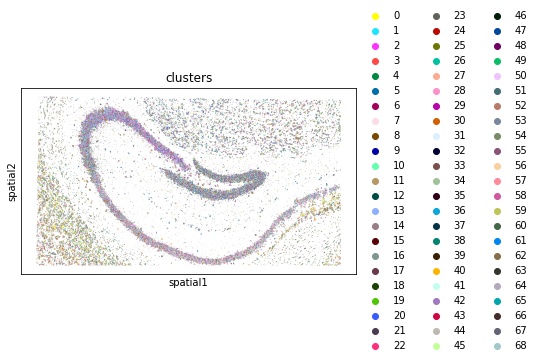

In [6]:
sc.pp.filter_cells(adata,min_counts=2)
sc.pp.log1p(adata)
sc.pp.normalize_total(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata, key_added="clusters")
sc.pl.spatial(adata, basis='spatial', color='clusters', spot_size=5)